<br/><br/><br/>
<center><span style="color:black; font-weight: bold; font-size:24pt">Основы статистики. Часть 2</span></center>
<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Анализ номинативных данных</span></center>
<br/>

<center><span style="color: violet; font-weight: bold; font-size:14pt">Критерий χ²-Пирсона</span></center>

**H<span style = "font-size: 7pt">0</span>:** Распределение частот не отличимо от ожидаемого<br/>
**H<span style = "font-size: 7pt">1</span>:** Распределение частот отличимо от ожидаемого<br/>
**Задача:** Определить, насколько статичстически значимы различия между ожидаемыми и эмпирическими значениями

<br/>
<span style="color: orange; font-weight: bold; font-size:12pt">Расстояние Хи-квадрат:</span>
<br/><br/>
<center><strong><i>χ² = ∑( (O<span style = "font-weight: bold; font-size: 7pt">i</span> - E<span style = "font-weight: bold; font-size: 7pt">i</span>)² / E<span style = "font-weight: bold; font-size: 7pt">i</span> )</i></strong></center>

где значения <i>O<span style = "font-weight: bold; font-size: 7pt">i</span> (Observed)</i> - наблюдаемые частоты, <i>E<span style = "font-weight: bold; font-size: 7pt">i</span> (Expexted)</i> - ожидаемые частоты.

<br/>

![x2_rasstoyznie](pictures/x2_rasstoyznie.jpg)

<br/>
<span style="color: orange; font-weight: bold; font-size:12pt">Распределение <i>χ²</i> с <i>k</i> степенями свободы</span> (<i>k</i> - сумма слагаемых) — распределение суммы квадратов <i>k</i> независимых стандратных (со средним M<span style= "font-weight: bold; font-size:7pt">z</span> = 0 и дисперсией D<span style= "font-weight: bold; font-size:7pt">z</span> = 1) случайных величин, распределённых нормальным образом.

На графике видно, что отклонение от заданной точки до нуля (<i>χ²</i>) равняется гипотенузе прямоугольного треугольника со сторонами, равными значениям координат по осям <i>OX</i> и <i>OY</i>:

![dvum_raspr](pictures/dvum_raspr.jpg)

![x2_rasspr](pictures/x2_rasspr.jpg)

Чем больше число степеней свободы у распределения хи-квадрат, тем более симметричным становится такое распределение, и тем больше распределение Хи-квадрат стремится к нормальному.

[Почему df = N-1 ?](https://stepik.org/lesson/24814/step/10?unit=7105) <br/>
<span style="color: gray">При заданном количестве значений только <i>N-1</i> значений будут независимы, зная их все, последнюю <i>1</i> мы всегда можем предсказать, следовательно <i>1</i> значение всегда не независимо от других и его не следует учитывать.</span>

<span style="color: green; font-weight: bold; font-size:12pt">Расчёт p-value</span> - [Online-калькулятор для вычисления p-value](https://gallery.shinyapps.io/dist_calc/)

<br/>
<ins>Рассчитаем значение <i>χ²</i> и p-value в Python:</ins>

In [41]:
#from scipy import stats

chi2_value, chi2_pvalue = stats.chisquare([18, 55, 27], f_exp=[25, 50, 25]) 
# Первый массив - эмпирические значения
# Второй массив(f_exp=) - ожидаемые значения, можно не указывать, если ожидаемые значения равномерны

print(f'Хи-квадрат = {chi2_value:.2f}, p = {chi2_pvalue:.3f}')

Хи-квадрат = 2.62, p = 0.270


<br/>
<ins>Какой процент наблюдений лежит в диапазоне:</ins>

In [42]:
#from scipy import stats
chi2_down=stats.chi2.cdf(2 , 2) # - (нижняя граница диапазона, число степеней свободы)
chi2_up=stats.chi2.cdf(4 , 2) # - (верхняя граница диапазона, число степеней свободы)
# stats.chi2.cdf() - вероятность попасть в 95%, т.е. значение, обратное p-value (= 1 - p-value)

chi2_interval = chi2_up - chi2_down
print(f'В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит {chi2_interval:.1%} наблюдений.')

В диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы лежит 23.3% наблюдений.


<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Анализ таблиц сопряженности</span></center>

**H<span style = "font-size: 7pt">0</span>:** Распределение частот не отличимо от ожидаемого<br/>
**H<span style = "font-size: 7pt">1</span>:** Распределение частот отличимо от ожидаемого, иными словами: номинативные переменные взаимосвязаны между собой<br/>
**Задача:** Исследование наличия взаимосвязи между двумя номинативными переменными

<br/>

<span style="color: green; font-weight: bold; font-size:12pt">Расчёт ожидаемых значений:</span>

<br/>
<center><strong><i>f<span style = "font-weight: bold; font-size: 7pt">ij</span> = (f<span style = "font-weight: bold; font-size: 7pt">i</span> * f<span style = "font-weight: bold; font-size: 7pt">j</span>)/ N</i></strong></center>

где <i>f<span style = "font-weight: bold; font-size: 7pt">i</span></i> - сумма в строке, <i>f<span style = "font-weight: bold; font-size: 7pt">j</span></i> - сумма в столбце, <i>N</i> - количество наблюдений в выборке.

<br/>

![ozhid_znacheniya](pictures/ozhid_znacheniya.jpg)

Для поиска взаимосвязи между номинативными переменными, применяем критерий <i>χ²</i>-Пирсона, который проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого. И рассчитываем p-value со степенями свобод, равными:

<br/>
<center><strong><i>df = (n - 1) * (m - 1)</i></strong></center>

где <i>n</i> - количество столбцов таблицы, <i>m</i> - количество строк

<br/>
В теории распределение <i>χ²</i> непрерывно, тогда как вычисляемые значения всегда дискретны, в результате <i>H<span style = "font-size: 7pt">0</span></i> может отвергаться слишком часто. Чтобы скорректировать значение p-уровня значимости применяется <span style="color: orange; font-weight: bold; font-size:12pt">Поправка Йетса</span> на непрерывность. (Используется для анализа таблицы сопряженности два на два, где значения ожидаемых и наблюдаемых частот в каждой ячейке больше 5, но меньше 10).<br/>

<br/>
<center><strong><i>χ²<span style = "font-weight: bold; font-size: 7pt">Yates</span> = ∑( (|f<span style = "font-weight: bold; font-size: 5pt">O</span> - f<span style = "font-weight: bold; font-size: 5pt">E</span>| - 0.5)² ) / f<span style = "font-weight: bold; font-size: 5pt">E</span></i></strong></center>

где f<span style = "font-weight: bold; font-size: 5pt">O</span> - эмпирическое значение в ячейке, f<span style = "font-weight: bold; font-size: 5pt">E</span> - ожидаемое значение в ячейке

<br/>
<ins>Рассчитаем ожидаемые значения, число степеней свобод, значение <i>χ²</i> и p-value в Python:</ins>

In [43]:
#from scipy import stats
observed_array = [ [18, 7], [6, 13] ]

chi2_value, p_value, df_value, expected_array = stats.chi2_contingency(observed_array, correction=False) 
# 'correction=True' - поправка Йетса, работает по умолчанию при df=1, поэтому можно удалить из формулы и ничего не изменится

print(f'Хи-квадрат = {chi2_value:.3f} \np-value = {p_value:.3f} \ndf = {df_value}')
print(f'\nОжидаемые значения:\n{expected_array}')

Хи-квадрат = 7.114 
p-value = 0.008 
df = 1

Ожидаемые значения:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Интерпретретация остатков:</span>

Анализ остатков (разница между ожидаемыми и эмпирическими значениями) позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений.

+ Если значения стандартизированных остатков больше 3х, можно считать, что в этой ячейке зафиксированы значимые отклонения.

<br/>
<ins>Построим наглядный график в Python:</ins>

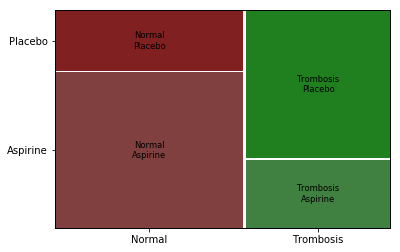

In [44]:
from statsmodels.graphics.mosaicplot import mosaic
pill_data = {('Normal', 'Aspirine'): 18, 
             ('Normal', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13
            }
# Значения 18, 7, 6, 13 являются входными значениями и соответсвуют таблице observed_array = [ [18, 7], [6, 13] ]

my_plot = mosaic(pill_data, gap=.009)

# Ширина прямоугольников соответствует количеству наблюдений
# Высота прямоугольников соответствует отклонению ожидаемых и наблюдаемых частот в этой ячейке

<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Условия применимости критерий χ² при анализе таблиц сопряжённости:</span>

+ Все наблюдения независимы
+ Минимальное количество наблюдений в каждой из ячеек должно быть больше 5 (иначе нарушается предположение о нормальном распределении переменных)

В случае когда размер выборки очень маленький и наблюдений в каждой из ячеек недостаточно (меньше 5), используется <span style="color: violet; font-weight: bold; font-size:13pt">точный критерий Фишера</span>:

![tochniy_fisher](pictures/tochniy_fisher.jpg) 
[Как выводится эта формула](https://stepik.org/lesson/26447/step/3?unit=8328)

![tochniy_fisher_primer](pictures/tochniy_fisher_primer.jpg)

Почему не рассматриваются варианты 3,1 + 4,0? -> В тесте Фишера фиксированы и суммы по строкам, и суммы по столбцам.

<br/>

<ins>Расчёт p-value с применением точного критерия Фишера в Python:</ins>

In [45]:
#from scipy import stats
odds_ratio, p_value = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio - отношение шансов

print(p_value)

0.48571428571428527


<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Метод логистической регрессии</span></center>
<br/>
<span style="color: violet; font-weight: bold; font-size:14pt">Логистическая регрессия</span> используется для исследования взаимосвязи между номинативной зависимой переменной, имеющей всего 2 градации, и различными независимыми переменными (в качестве предикторов могут быть как номинативные, так и количественные переменные).

Номинативную переменную с двумя градациями можно представить как два зависимых друг от друга вероятностных исхода, равных <i>p</i> и <i>(1 - p)</i>. <br/>
Тогда регрессионная модель, в которой зависимая переменная — это номинативная переменная с двумя градациями:

![log_regr](pictures/log_regr.jpg)

<span style="color: orange; font-weight: bold; font-size:12pt">Odds (шансы)</span> **= <i>p / (1 - p)</i>** - это отношение вероятности успеха <i>(p)</i> к вероятности неудачи <i>(1 - p)</i> , ∈ \[0; +∞)

<span style="color: orange; font-weight: bold; font-size:12pt">Логарифм шанса <i>(log odds)</i></span> = <i>logit (p)</i> , ∈ (-∞; +∞)

+ если <i>log odds > 0 </i>, то <i>p > 1 - p </i>
+ если <i>log odds < 0 </i>, то <i>p < 1 - p </i>

![log_shans](pictures/log_shans.png)

In [46]:
#import math

# Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?
math.log(30/70)

# Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:
math.exp(-1) / (1 + math.exp(-1))

0.2689414213699951

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель без предикторов</span></center>

<br/>Модель без предикторов описывается уравнением: **<i>y = intercept</i>** (одному числу, без предикторов)

<span style="color: orange; font-weight: bold; font-size:12pt">Intercept</span> - натуральный логарифм шансов положительного исхода. И свободный член логистической регресии.

Т.е. мы хотим предсказать логарифм шансов, используя только одно число: **<i>log( p/(1-p) ) = intercept</i>**

<br/>

**H<span style = "font-size: 7pt">0</span>:** Нет никакой разницы между исходом №1 и исходом №2 и нормальное распределение описывает распределение коэффициентов логистической регрессии:
+ <i>p = 1 - p</i>;
+ <i>odds = 1</i>;
+ Логарифм шансов <i>logit(p) = 0</i> , т.е. logit(p) (он же intercept) имеет нормальное распределение со средним равным 0

<br/>

![intercept_only_model](pictures/intercept_only_model.jpg)

Интерпретация расчётной таблицы:
+ Estimate - значение intercept (логарифма шансов)
+ Полученная в расчётах стандартная ошибка (<i>se</i>) - это стандартное отклонение, которое имело бы нормальное распределение коэфициента intercept со средним равным 0
+ Тогда если разделить значение коэфициента intercept на стандартную ошибку, то получим <i>z-value</i> – расстояние до 0 в стандартных отклонениях.
+ Pr(>|z|) - значение <i>p-value</i>, т.е. вероятность получить такое или ещё более сильное отличие intercept от 0 при условии, что верна нулевая гипотеза

In [47]:
'''
С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, 
что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. 
В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход), 
а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979. 
Сколько человек всё-таки сдало экзамен?
'''

def find_n_sdalo (logit_p, n_vsego):
    p = math.exp(logit_p) / (1 + math.exp(logit_p))
    n_sdalo = round(p * n_vsego)
    return n_sdalo

logit_p = -0.8472979
n_vsego = 50

find_n_sdalo (logit_p, n_vsego)

15

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель с одним номинативным предиктором</span></center>

Таблица зависимостей шансов выжить у мужчин и женщин:
![y_n_f_m](pictures/y_n_f_m.jpg)

<br/><i>odds_male</i> = 93 / 360 = 0.26
<br/><i>odds_female</i> = 197 / 64 = 3.08

**intercept** - натуральный логарифм шансов положительного исхода для женщин
<br/><i>log(odds_female)</i> = 1.12

**коэф-т при Х** - натуральный логарифм отношения шансов положительного исхода для мужчин и шансов для женщин (он же - разность логарифмов шансов)
<br/><i>odds_ratio = odds_male / odds_female</i>
<br/><i>log(odds_ratio) </i> = - 2.48
<br/>По свойству логарифмов: <i>log(odds_ratio) = log(odds_male) - log(odds_female)</i> 

![log_model_1x](pictures/log_model_1x.jpg)

Т.к. переменные Female и Male зависимы друг от друга (мультиколлинеарны), разумно в построении модели использовать только одну из них (любую, у нас выбраны женщины, просто по алфавиту), а вторую назначить значением intercept. Поэтому, смотрим, какой градации-предиктора нет среди коэффициентов, это и будет intercept

![ln_odds](pictures/ln_odds.jpg)
<br/><i>log(odds_female)</i> = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 0 = 1.12
<br/><i>log(odds_male)</i> = 1.12 - 2.48 * Sex_Male = 1.12 - 2.48 * 1 = - 1.35

<br/>Интерпетация таблицы, если значений зависимой переменной более двух:

![log_regr_1x-3](pictures/log_regr_1x-3.png)

<br/>В отличии от теста χ²-Пирсона, логистическая регрессия не только указала что две переменные взаимосвязаны, но указала шансы для разных градаций независимой переменной.

<br/>[Сколько предикторов наиболее удачно включитьв логистическую модель?](https://stepik.org/lesson/26555/step/10?unit=8403)

<br/><ins>Расчёт логистической модели с одним номинативным предиктором в Python:</ins>

In [48]:
#import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

category_columns = { col: 'category' for col in ['Survived', 'Sex'] }  # приведение выбранных колонок к категориальному

data_titanic = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv', dtype=category_columns)
data_titanic = data_titanic[data_titanic.Age.notnull()]

# Зависимая переменная обычно обозначается как "Y" или "y"
Y = data_titanic.loc[:,'Survived'].cat.codes

# То о чем говорил преподаватель: колонку пол c двумя градациями нужно трансформировать в 2 колонки для каждого пола
X = sm.add_constant( data_titanic.loc[:,'Sex'].cat.codes )

#
# ВЫЧИСЛЯЕМ  
#
# Классическое представление результат-предиктор(ы), которое используется в классификаторах
glm_binom = sm.GLM(Y, X, family=sm.families.Binomial())
res = glm_binom.fit()

# Можно и так (кто привык к R)
glm_binom_rstyle = smf.glm(formula="Survived ~ Sex", data=data_titanic, family=sm.families.Binomial())
res_rstyle = glm_binom_rstyle.fit()


print( res.summary() )
print('\n\n')
print( res_rstyle.summary() )

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Tue, 05 May 2020   Deviance:                       750.70
Time:                        14:17:20   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.144      7.814      0.0

<br/><br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Модель с двумя номинативными предикторами</span></center>

<br/>Таблицы зависимостей шансов выжить у мужчин и женщин в зависимости от класса:

![y_n_f_m_1_2_3](pictures/y_n_f_m_1_2_3.png)

На графике:

![gr_y_n_f_m_1_2_3](pictures/gr_y_n_f_m_1_2_3.jpg)


Интерпретация таблицы:

![tab_y_n_f_m_1_2_3](pictures/tab_y_n_f_m_1_2_3.jpg)

<br/>Уравнение регрессии:

<br/><center><i>ln(odds) = 3.3 - 3.7\*SexMale - 0.88\*PclassSecond - 3.46\*PclassThird - 0.42\*SexMale\*PclassSecond  + 2.15\*SexMale\*PclassThird</i></center> 

<br/><center><span style="color: violet; font-weight: bold; font-size:14pt">Смешаная регрессионная модель</span></center>

Модель, в которой учитываются и количественные и номинативные переменные

![dif_regr](pictures/dif_regr.png)

<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Непараметрические методы</span></center>
<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">U-критерий Манна-Уитни</span></center>

<span style="color: gray">Непараметрический аналог <i>t</i>-критерия Стьюдента. Используется для оценки различий между двумя независимыми выборками, в которых признак измерен в метрической или ранговой шкале.</span>

[Видео на Stepik](https://stepik.org/lesson/26822/step/3?unit=8557)

Самым популярным непараметрическим критерием для сравнения двух групп является U-критерий Манна — Уитни. Логика данного критерия заключается в том, что вместо сравнения средних значений в двух выборках критерий сравнивает сумму рангов (не медианы, как многие думают). Мы сначала упорядочиваем все данные, затем рассчитываем сумму рангов в каждой из групп.

Затем для каждой из выборок рассчитывается показатель:

![U_1](pictures/U_1.jpg)

Наименьшее из полученных значений и выступает в качестве статистики теста. Легко показать, что при условии верности нулевой гипотезы распределение этой статистики подчиняется нормальному распределению, где 

![U_2](pictures/U_2.jpg)

что и позволяет нам рассчитать вероятность получить наблюдаемые или еще более выраженные различия суммы рангов.

**Разумно применять вместо t - теста:**

1. Распределения хотя бы в одной из выборок значительно отличается от нормального. 
2. Есть заметные выбросы в данных. 
3. В некоторых задачах мощность теста даже выше, чем t критерия (например, когда обеих выборках наблюдается заметная асимметрия в одинаковом направлении). 

**Неразумно применять:**

1. Выборки разного размера, с различным направлением асимметрии.  

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Критерий Краскела-Уоллиса</span></center>

Если при сравнении трёх и более групп нарушаются требования и к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса.

![KruskalWallis_1](pictures/KruskalWallis_1.jpg)

![KruskalWallis_2](pictures/KruskalWallis_2.jpg)

<br/><br/>
<center><span style="color:gray; font-weight: bold; font-size:18pt">Кластерный анализ и метод главных компонент</span></center><br/>

Метод кластерного анализа относится к группе методов "обучение без учителя". Это значит, что никто не знает правильного ответа на интересующий нас вопрос и нет никакой обратной связи.

**Постановка задачи:** Разбить данные на группы

<span style="color: orange; font-weight: bold; font-size:12pt">Кластерный анализ</span> - анализирует наблюдения (по строкам), и отвечает на вопросы, есть ли в данных подгруппы/кластеры испытуемых и сколько таких кластеров лучше выделить.

<span style="color: orange; font-weight: bold; font-size:12pt">Метод главных компонент</span> - анализирует наблюдения (по столбцам), и отвечает на вопрос можно ли сократить размерность данных, объединив некоторые из них в группы (интегративные переменные).

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Кластерный анализ методом k-средних</span></center>
<br/>

**Алгоритм метода k-средних:**
1. Сами решаем на сколько кластеров будем делить.
2. Случайно выбираем начальные позиции центроидов кластера.
3. Для каждого наблюдения определяем, к какому центроиду он ближе всего.
4. Обновим позиции центроидов (среднее по каждой переменной для группы).
5. Если принадлежности некоторых точек изменились, то пункт 4, иначе алгоритм сошелся.

<span style="color: orange; font-weight: bold; font-size:12pt">Центроиды</span> - геометрические центры предполагаемых кластеров с координатами \[ср.значение переменной OX в границах кластера; ср.значение переменной OY в границах кластера\]

[Визуализация метода](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

В методе существует элемент случайности. При многократном повторении кластеризации на одних и тех же данных мы можем получать различные варианты кластерного решения. Чем менее явно представлена в наших данных кластерзация наблюдений, тем более существенными могут оказаться различия. 

Возможно метод сойдется не очень удачно: метод “увяз” в локальном минимуме. 
**Решения:** 
+ Начальные точки брать наиболее далеко друг от друга; 
+ Провести кластерный анализ много раз с разными начальными позициями. (Если каждый раз из разных случайных начальных положений центроидов, кластерный анализ приходит в одно и то же положение, скорее всего, это не случайно)

<br/>
<span style="color: green; font-weight: bold; font-size:12pt">Оптимальное число кластеров</span>

Для того, чтобы выяснить, какое число кластеров оптимально, можно многократно проводить кластерный анализ, каждый раз выделяя разное кол-во кластеров и каждый раз забисываем значение общей внутрикластерной суммы квадратов.

Если добавление одного кластера в наши данные значительно понижает общую сумму квадратов, то в увелечении числа кластеров есть смысл. Когда последующее увеличение кластеров уже не оказывает такого сильного влияния, значит мы нашли оптимальное число кластеров.

Если при увелечении числа кластеров плавное снижение общей внтуригрупповой суммы квадратов, то значит нет явной класторной структуры в данных.

![klaster](pictures/klaster.jpg)

<ins>Расчёт внутригрупповой суммы квадратов в Python:</ins>

In [49]:
from sklearn.cluster import KMeans
#import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])

# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)

# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)

# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

[[3. 5.]]
146.0


<br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Иерархическая кластеризация</span></center>

**Идея метода:**
+ Рассчитывается расстояние от каждой точки до каждой точки 
+ Производится кластеризация методами иереархической кластеризации, например:
 + [метод одиночной связи (ближайшего соседа)](https://stepik.org/lesson/27110/step/2?unit=8682) - Постепенно объеденяет две самые близкие точки в кластер, заменея их центроидом. В первую очередь объединяет самые близкие точки.
 + метод дальнего соседа - в последнюю очередь объединяет самые близкие точки.
 
![klaster2](pictures/klaster2.png)

![klaster1](pictures/klaster1.png)

**Методы иерархической кластеризации и k-средних можно комбинировать**. Сначала применить метод иерархической кластеризации, оценить полученное количество веток, и использовать это число для метода k-средних.

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Метод главных компонент</span></center> 
 
![pca](pictures/pca.png)

В случае сильной корреляции двух переменных, регрессионная прямая может стать осью главной компоненты (РС1). Тогда значения новой интегративной переменной - это проекция(расстояние) на ось РС1. 

Значения по оси РС1 - это значения корреляции м/у двумя переменными. Например, OX-рост OY-вес, тогда РС1-конституция тела.

Чем сильнее корреляция м/у переменными, тем меньше информации потеряется. При этом "знак" отклонения не учитывается, т.е. зная только значение по оси РС1 мы не можем знать, в какую сторону от регр. прямой отклоняется предсказ.наблюдение.

Информация о "знаке" предсказ. значения может хранится в оси РС2 - перпендикуляру оси РС1. Но с учётом информациии по оси РС2, мы увеличиваем процент объяснённой дисперсии всего на 5%, что позволяет нам не учитывать эту информацию.

![pca2](pictures/pca2.png)

Таким образом, корреляционная прямая, новая ось РС1, становится одной новой переменной (интегративной переменной) вместо двух переменных по осям OX и OY. Это позволяет нам снизить размерность данных.

![biplot](pictures/biplot.png)

Если на графике biplot угол между переменными равен 90 градусов, значит коэффициент корреляции межу ними равняется нулю.

[Пример анализа главных компонент, когда переменных больше двух](https://stepik.org/lesson/27111/step/6?unit=8681)

<br/><br/>
<center><span style="color: violet; font-weight: bold; font-size:14pt">Факторный анализ</span></center>

![factor](pictures/factor.jpg)